In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 준비

In [2]:
df = pd.read_csv('C:/Users/82109/Desktop/Study/AI Basic Course/data/mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### 2. 데이터 탐색

In [10]:
df.dropna(subset=["weight"],inplace=True)
df.dropna(subset=['mpg'],inplace=True)
print(df.mpg.count())
print(df.weight.count())

398
398


In [11]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


### 3. 데이터 선택

In [6]:
df_mpg_weight = df[['mpg','weight']]
df_mpg_weight.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


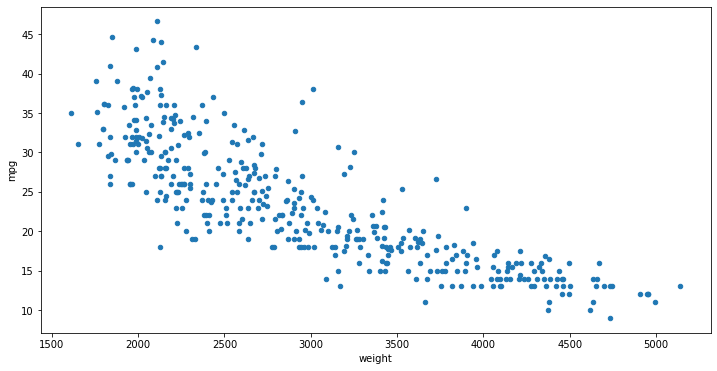

In [13]:
df_mpg_weight.plot(kind = 'scatter',x='weight',y='mpg',figsize = (12,6))
plt.show()

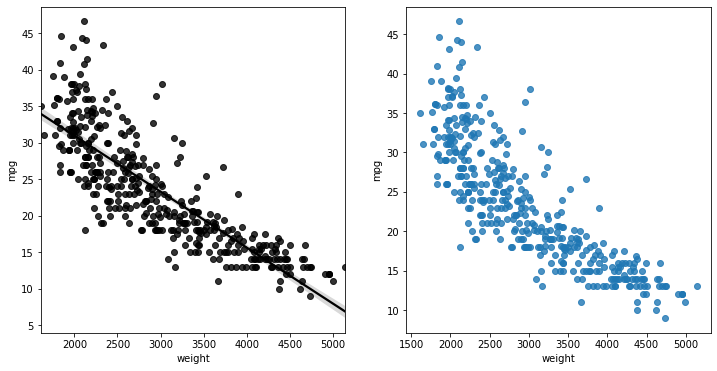

In [20]:
figure = plt.figure(figsize=(12,6))
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)
sns.regplot(x = 'weight',y='mpg',data = df_mpg_weight,ax=ax1,color='black')
sns.regplot(x = 'weight',y='mpg',data = df_mpg_weight,ax=ax2,fit_reg=False)
plt.show()

### 4. 데이터셋 구분

In [25]:
# 8:2
x = df_mpg_weight[['weight']]
y = df_mpg_weight[['mpg']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(len(x))
print(len(y))

398
398


In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
print(lr.coef_) # w   y = wx + b
print(lr.intercept_) #b

[[-0.00736786]]
[45.46032355]


In [31]:
y_predict = lr.predict(x)

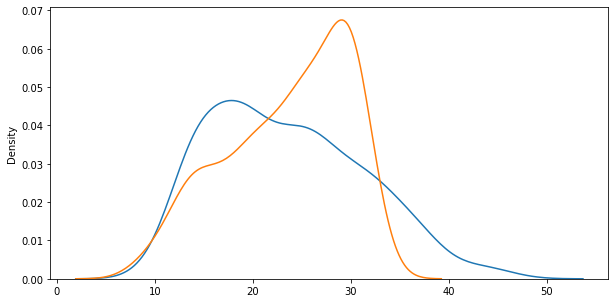

In [36]:
figure = plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_predict,hist=False,label='y_predict')
plt.show()